In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from matplotlib.pyplot import figure
from scipy.stats import linregress


In [2]:

crypto_path = "cleaned_crypto.csv"
xiv_path = "VIXdata.csv"

crypto_data = pd.read_csv(crypto_path,low_memory=False)
vix_data = pd.read_csv(xiv_path)

In [3]:
#filter the data with 4 agreed cryptos

fourcoin_data = crypto_data.loc[crypto_data['crypto_name'].isin(['Bitcoin','Ethereum','Dogecoin','Stellar'])]


In [4]:
#grouping the data based on their name and trade year 

#fourcoin_data = fourcoin_data.groupby(['trade_year', 'crypto_name'])

#fourcoin_data.head(20)


In [5]:
#vix_data = vix_data[(vix_data['Date'] >= '2016-01-01')]
vix_data = vix_data[(vix_data['Date'] >= '2016-01-01') & (vix_data['Date'] <= '2020-08-09')]


#vix_data = vix_data[["Date","Adj Close"]]
vix_data = vix_data.rename(columns={"Adj Close": "Adj_close"})


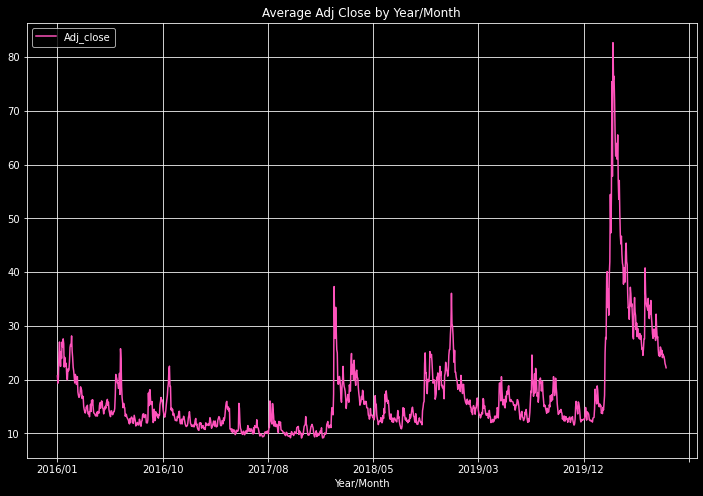

In [6]:
# make a data frame copy and add new columns
vix_df_copy= vix_data.copy()
vix_df_copy['Month'] = pd.DatetimeIndex(vix_df_copy['Date']).month
vix_df_copy["Month"] = vix_df_copy.Month.map("{:02}".format) # format month to 2 digits
vix_df_copy['Year'] = pd.DatetimeIndex(vix_df_copy['Date']).year
vix_df_copy['Year/Month'] = vix_df_copy['Year'].astype(str) + "/" + vix_df_copy['Month'].astype(str)
#vix_df_copy

# print vix graph for the whole 2016 - 2021 period
plt.style.use("dark_background")
vix_df_copy.plot(kind='line', x='Year/Month', y='Adj_close', color='#FE53BB', 
                            fontsize=10, title = "Average Adj Close by Year/Month", grid=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

In [7]:
# filter by dates
fourcoin_data = fourcoin_data[(fourcoin_data['trade_date'] >= '2016-01-01') & (fourcoin_data['trade_date'] <= '2020-08-09')]
#fourcoin_data.head()

In [8]:
merged_df = fourcoin_data.merge(vix_data, left_on='trade_date', right_on='Date')


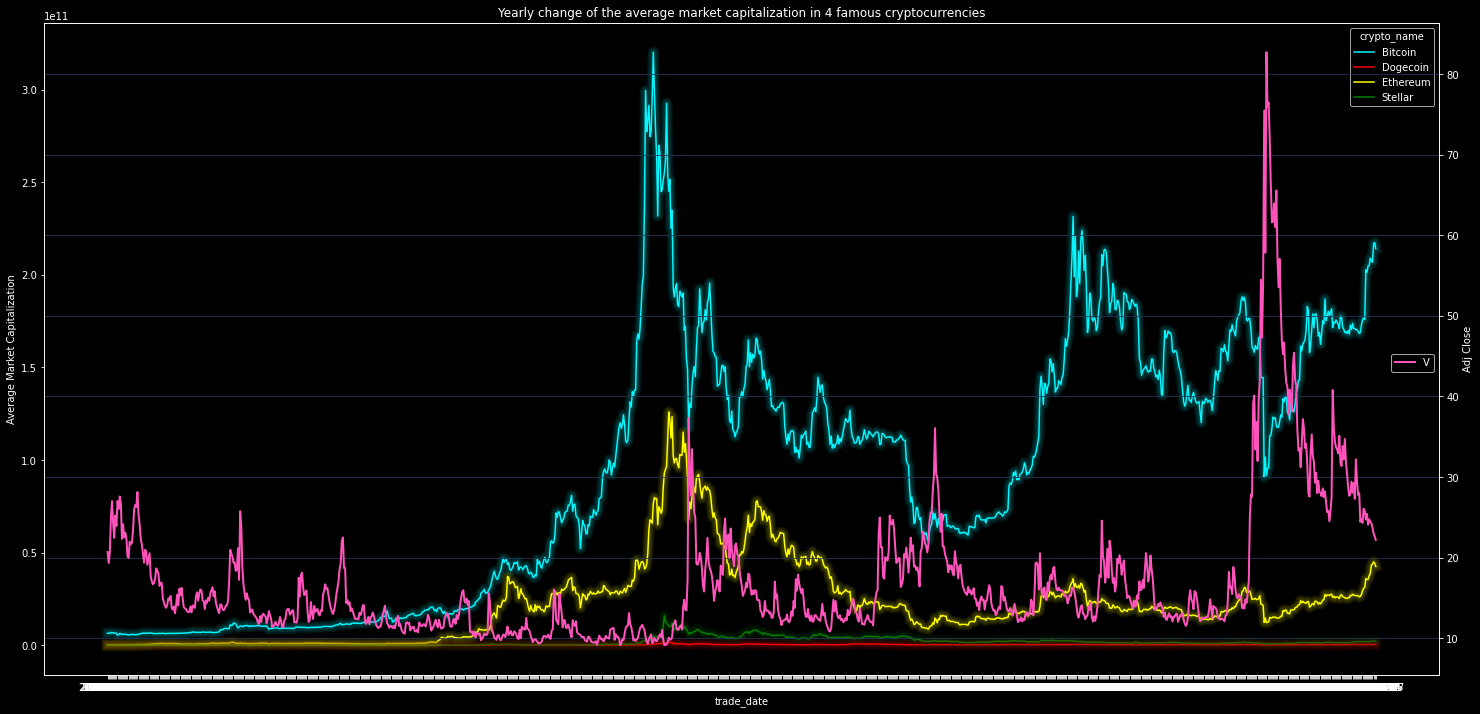

In [30]:
#Yearly change of the market cap in 4 famous crypto


plt.style.use("dark_background")
#plt.style.use("seaborn-dark")


colors = [
    '#08F7FE',  # teal/cyan
    'red',    # red
    'yellow',  # yellow
    'green',   # green
    'blue',   # blue
    '#00ff41', # matrix green
]

#plot data
fig, ax = plt.subplots(figsize=(25,12))
ax.grid(color='#2A3459')

#use unstack()

df_to_plot = merged_df.groupby(['trade_date','crypto_name']).mean()['market_cap'].unstack()
#print(df_to_plot.head())

first_plot = df_to_plot.plot(marker='None', kind = "line", ax=ax, color=colors)
first_plot.set_xlabel("Trade Year")
first_plot.set_ylabel("Average Market Capitalization")

#Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df_to_plot.plot(marker='None',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)


 
#vix_data.plot(x='Date', ax=first_plot)

ax2 = first_plot.twinx()
line, = ax2.plot(merged_df.Date, merged_df.Adj_close, marker='None', color='#FE53BB', linewidth=2)

ax2.set_ylabel('Adj Close')  # we already handled the x-label with ax1
ax2.grid(color='#2A3459')
ax2.legend(ncol=1, labels='Vix', loc = 'best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), mode='None', handlelength = 2.0)





#plt.xlabel("Trade Year")
#plt.ylabel("Average Market Capitalization")
plt.title("Yearly change of the average market capitalization in 4 famous cryptocurrencies")
plt.grid(True)

plt.savefig("Yearly change of the market cap in 4 famous crypto.png")


In [10]:
# Correlation VIX and Bitcoin Price
bitcoin_df = merged_df[merged_df['crypto_name'] == 'Bitcoin']
r, p = st.pearsonr(bitcoin_df['Adj_close'], bitcoin_df['price_usd'])
#print("r:", r, "p:", p)
print("Correlation between VIX and Bitcoin price:", r)
print("----------------------------------------------------------------")


# Correlation VIX and Ethereum Price
ethereum_df = merged_df[merged_df['crypto_name'] == 'Ethereum']
r, p = st.pearsonr(bitcoin_df['Adj_close'], ethereum_df['price_usd'])
#print("R value:", r, "P value:", p)
print("Correlation between VIX and Ethereum price:", r)



Correlation between VIX and Bitcoin price: 0.15269243519296272
----------------------------------------------------------------
Correlation between VIX and Ethereum price: -0.06839784707169436
